Импорт библиотек

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

RBF

In [1103]:
def func(x):
    return (x ** 2) * np.exp(np.cos(x))

def fun_activation(x, r, c):
    return np.exp(-np.square(x - c) / np.square(r))

def fun_h(x, r, c):
    return np.exp(-r * np.abs(x - c))

def fun_H(t_x, t_c, r):
    H = np.zeros((len(t_x), len(t_c)))
    for i in range(len(t_x)):
        for j in range(len(t_c)):
            H[i][j] = fun_h(t_x[i], r, t_c[j])
    return H

def fun_RBN(x, t_c, a, w):
    h = np.zeros((len(t_c)))
    for i in range(len(t_c)):
        h[i] = fun_h(x, a, t_c[i])
    return np.dot(h, w)

RBF вывод

In [1104]:
x = np.linspace(-1, 1, 100)
y =  func(x)


r = 1.5
test_c = np.array([-1, 0, 1])
alpha = 1 / (2 * (r ** 2))
H = fun_H(x, test_c, r)
print(H)

H_ = np.dot(np.linalg.inv(np.dot(H.transpose(), H)), H.transpose())
w = np.dot(H_, y)
pred_Y = np.zeros((len(x)))
for i in range(len(x)):
    pred_Y[i] = fun_RBN(x[i], test_c, r, w)

[[1.         0.22313016 0.04978707]
 [0.9701515  0.22999517 0.05131886]
 [0.94119394 0.23707139 0.05289778]
 [0.91310072 0.24436533 0.05452528]
 [0.88584603 0.25188368 0.05620285]
 [0.85940486 0.25963335 0.05793203]
 [0.83375292 0.26762144 0.05971442]
 [0.80886665 0.27585531 0.06155164]
 [0.78472319 0.28434251 0.06344539]
 [0.76130039 0.29309083 0.0653974 ]
 [0.73857671 0.30210831 0.06740947]
 [0.71653131 0.31140322 0.06948345]
 [0.69514393 0.32098412 0.07162124]
 [0.67439493 0.33085978 0.0738248 ]
 [0.65426525 0.34103929 0.07609615]
 [0.63473642 0.351532   0.07843739]
 [0.61579049 0.36234752 0.08085066]
 [0.59741007 0.37349581 0.08333818]
 [0.57957828 0.3849871  0.08590223]
 [0.56227874 0.39683194 0.08854517]
 [0.54549556 0.4090412  0.09126943]
 [0.52921334 0.42162611 0.0940775 ]
 [0.51341712 0.43459821 0.09697197]
 [0.49809239 0.44796942 0.09995549]
 [0.48322508 0.46175203 0.1030308 ]
 [0.46880154 0.47595868 0.10620074]
 [0.45480852 0.49060242 0.1094682 ]
 [0.44123317 0.50569671 0.11

Персептрон

In [1105]:
class Perceptron:
    def __init__(self, neurons):
        self.hidden_weights = np.zeros(neurons)
        self.hidden_biases = np.zeros(neurons)
        self.output_weights = np.zeros(neurons)
        self.hidden_outputs = np.zeros(neurons)
        self.neurons = neurons
        self.loss_list = list()

    def init_w(self):
        for i in range(self.neurons):
            self.hidden_weights[i] = rnd.random() - 0.5
            self.hidden_biases[i] = rnd.random() - 0.5
            self.output_weights[i] = rnd.random() - 0.5

    def activation(self, s, rounded: bool):
        if rounded:
            return 1 if 1 / (1 + math.exp(-s)) >= 0.5 else 0
        else:
            return 1 / (1 + math.exp(-s))

    def div(self, s):
        return self.activation(s, False) * (1 - self.activation(s, False))

    def predict(self, x):
        pred = 0
        self.hidden_outputs = np.zeros(self.neurons)
        for id in range(len(self.output_weights)):
            self.hidden_outputs[id] = self.activation(self.hidden_weights[id] * x + self.hidden_biases[id], True)
            pred = pred + self.output_weights[id] * self.hidden_outputs[id]
        return pred

    def get_predicts(self, x):
        perceptron_predicts = np.zeros(len(x))
        for id in range(len(x)):
            perceptron_predicts[id] = self.predict(x[id])
        return perceptron_predicts

    def train(self, x_train, y_train, e):
        self.loss_list = list()
        for age in range(200):
            loss = 0
            for s_id in range(len(x_train)):
                sample = x_train[s_id]
                y_true = y_train[s_id]
                y_predicted = self.predict(sample)
                delta = y_true - y_predicted
                loss += delta ** 2
                rate = 0.5
                if abs(y_true - y_predicted > e):
                    grad = delta * self.div(np.dot(self.output_weights, self.hidden_outputs))
                    for w_id in range(self.neurons):
                        self.output_weights[w_id] \
                            = self.output_weights[w_id] \
                            - rate * grad * self.hidden_outputs[w_id]
                    for w_id in range(self.neurons):
                        self.hidden_weights[w_id]\
                            = self.hidden_weights[w_id] \
                            - rate \
                              * grad \
                              * self.output_weights[w_id] \
                              * self.div(self.hidden_weights[w_id] * sample + self.hidden_biases[w_id]) * sample
                        self.hidden_biases[w_id]\
                            = self.hidden_biases[w_id] \
                            - rate \
                              * grad \
                              * self.output_weights[w_id] \
                              * self.div(self.hidden_weights[w_id] * sample + self.hidden_biases[w_id]) * sample

                else:
                    break
            loss = math.sqrt(loss)
            self.loss_list.append(loss)
            if age % 100 == 0:
                print("after age: ", age, "\n",
                      "hidden weights:", self.hidden_weights, "\n",
                      "hidden biases:", self.hidden_biases, "\n",
                      "output_weights:", self.output_weights,
                )

        return self.get_predicts(x_train)



Вывод персептрона

In [1106]:
perc = Perceptron(9)
perc.init_w()
print(perc.hidden_weights, "\n", perc.hidden_biases, "\n", perc.output_weights)

[-0.07974514  0.08583194 -0.17074121  0.28283298  0.03432843 -0.3247676
 -0.36880689 -0.09982794  0.31173457] 
 [ 0.1896652  -0.29256319  0.37282172 -0.22366809  0.19401977 -0.21775012
 -0.28387578  0.05481879  0.14927515] 
 [-0.04207218 -0.23496149  0.20650856  0.10838347  0.34215063  0.29351381
  0.40796554 -0.45559106  0.44344797]


after age:  0 
 hidden weights: [-0.07974514  0.08583194 -0.17074121  0.28283298  0.03432843 -0.3247676
 -0.36880689 -0.09982794  0.31173457] 
 hidden biases: [ 0.1896652  -0.29256319  0.37282172 -0.22366809  0.19401977 -0.21775012
 -0.28387578  0.05481879  0.14927515] 
 output_weights: [-0.04207218 -0.23496149  0.20650856  0.10838347  0.34215063  0.29351381
  0.40796554 -0.45559106  0.44344797]
after age:  100 
 hidden weights: [-0.07974514  0.08583194 -0.17074121  0.28283298  0.03432843 -0.3247676
 -0.36880689 -0.09982794  0.31173457] 
 hidden biases: [ 0.1896652  -0.29256319  0.37282172 -0.22366809  0.19401977 -0.21775012
 -0.28387578  0.05481879  0.14927515] 
 output_weights: [-0.04207218 -0.23496149  0.20650856  0.10838347  0.34215063  0.29351381
  0.40796554 -0.45559106  0.44344797]


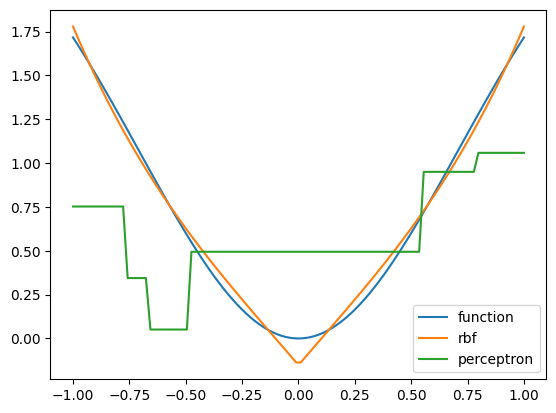

In [1107]:
plt.plot(x, y, label="function")
plt.plot(x, pred_Y, label="rbf")
plt.plot(x, perc.train(x, y, 1), label="perceptron")
plt.legend()
plt.show()

In [7]:
class Elman:
    def __init__(self,
                 input_number,
                 hidden_number,
                 output_number,
                 l_rate=0.1):
        self.l_rate = l_rate
        self.w_1 = np.random.uniform(-np.sqrt(1 / input_number),
                                     np.sqrt(1 / input_number),
                                     size=[input_number, hidden_number])
        self.b_1 = np.random.uniform(size=[1, hidden_number])
        self.w_2 = np.random.uniform(-np.sqrt(1 / hidden_number),
                                     np.sqrt(1 / hidden_number),
                                     size=[hidden_number, hidden_number])
        self.b_2 = np.random.uniform(size=[1, hidden_number])
        self.h = np.zeros(shape=[1, hidden_number])
        self.h_prev = np.zeros(shape=[1, hidden_number])
        self.w_3 = np.random.uniform(-np.sqrt(1 / hidden_number),
                                     np.sqrt(1 / hidden_number),
                                     size=[hidden_number, output_number])

    def activation(self, x):
        return np.tanh(x)

    def derivative(self, output):
        return 1 - np.tanh(output) ** 2

    def forward(self, x):
        self.x = x
        self.h_prev = self.h
        self.h = np.dot(self.x,self.w_1) + self.b_1 + np.dot(self.h_prev,self.w_2) + self.b_2
        self.h = self.activation(self.h)
        self.output = np.dot(self.h,self.w_3)
        return self.output

    def backward(self, y):
        error = self.output - y
        self.dw = np.dot(self.h.T,error)
        delta = self.derivative(self.h) * np.dot(error,self.w_3.T)
        self.dw_w1 = np.dot(self.x.T,delta)
        self.db_b1 = delta
        self.dw_w2 = np.dot(self.h_prev.T,delta)
        self.db_b2 = delta

    def update_weights(self):
        self.w_1 -= self.l_rate * self.dw_w1
        self.w_1 -= self.l_rate * self.db_b1
        self.w_1 -= self.l_rate * self.dw_w2
        self.b_2 -= self.l_rate * self.db_b2
        self.w_3 -= self.l_rate * self.dw

In [8]:
class SlidingWindow:
    def __init__(self, l_rate=0.1):
        self.l_rate = l_rate
        self.layers = []
        self.output = 0

    def append_layer(self, n_inputs, n_output, activate = False):
        self.layers.append(SlidingLayer(n_inputs, n_output, activate))

    def forward(self, input):
        self.output = input
        for layer in self.layers:
            self.output = layer.forward_propagate(self.output)
        return self.output

    def backward(self, y):
        error = self.output - y
        for layer in list(reversed(self.layers)):
            error = layer.backward_propagate(error)

    def update_weights(self):
        for layer in self.layers:
            layer.weight -= self.l_rate * layer.dw


class SlidingLayer:
    def __init__(self, n_inputs, n_output, activate = False):

        self.weight = np.random.uniform(low=-np.sqrt(1 / n_inputs),
                                        high=np.sqrt(1 / n_inputs), size=[n_inputs, n_output])

        self.activate = activate

    def activation(self, activation):
        if self.activate:
            return np.tanh(activation)
        return activation

    def derivative(self, output):
        if self.activate:
            return 1 - np.tanh(output) ** 2
        return 1

    def forward(self, x):
        self.input = x
        self.not_activated = np.dot(x,self.weight)
        self.out = self.activation(self.not_activated)
        return self.out

    def backward(self, error):
        delta = error * self.derivative(self.not_activated)
        self.dw = np.dot(self.input.T,delta)
        return np.dot(delta,self.weight.T)



31


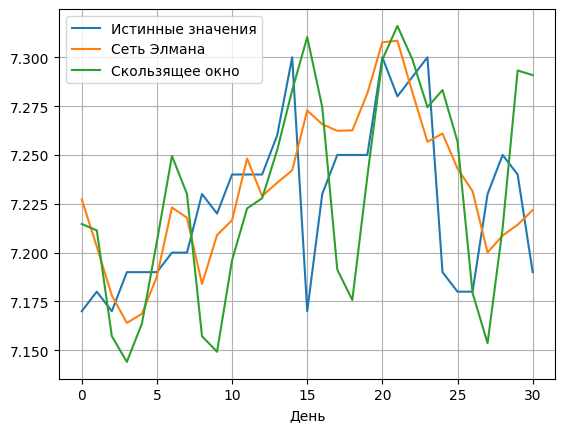

Sliding window hit rate:  0.967741935483871
Elman network hit rate:  1.0


In [13]:
y = np.loadtxt("coursedata.txt")
Y = y.copy()

def get_hit_rate(e):
    win_acc = 0
    el_acc = 0

    for i in range(count):
        if abs(Y[i] - window_predicted[i]) <= e:
            win_acc += 1
        if abs(Y[i] - elman_predicted[i]) <= e:
            el_acc += 1

    win_acc /= count
    el_acc /= count

    return win_acc, el_acc

len = 20
dataset = y

count = 0
for elem in Y:
    count += 1
print(count)

mean = np.mean(dataset)
std = np.std(dataset)
elman = Elman(len, 31, 1, 0.05)
perceptron = SlidingWindow(0.05)
perceptron.append_layer(len,
                        31,
                        activate = True)
perceptron.append_layer(31, 1)
for epoch in range(3000):
    q = np.random.randint(0, len)
    for i in range(q, count - len, len):
        x = (np.array(dataset[i : i+len]).reshape(1, len) - mean) / std
        y = (np.array(dataset[i+len : i+len+1]).reshape(1, 1) - mean) / std
        elman.forward(x)
        elman.backward(y)
        elman.update_weights()
        perceptron.forward(x)
        perceptron.backward(y)
        perceptron.update_weights()
rnn_y = []
perceptron_y = []

for i in dataset[-len:]:
    rnn_y.append((i - mean) / std)
    perceptron_y.append((i - mean) / std)

for i in range(count):
    out_rnn = elman.forward(np.array(rnn_y[i:i+len]).reshape(1, len)).reshape(-1)
    out_perceptron = perceptron.forward(np.array(perceptron_y[i:i+len]).reshape(1, len)).reshape(-1)
    rnn_y.append(out_rnn[0])
    perceptron_y.append(out_perceptron[0])

elman_predicted = np.array(rnn_y[len:]) * std + mean
window_predicted = np.array(perceptron_y[len:])* std + mean
plt.plot(Y, label="Истинные значения")
plt.plot(elman_predicted, label="Сеть Элмана")
plt.plot(window_predicted, label="Скользящее окно")
plt.xlabel("День")
plt.legend()
plt.grid()
plt.show()

for i in range(count):
    window_predicted[i] = round(window_predicted[i], 2)
    elman_predicted[i] = round(elman_predicted[i], 2)

win_acc, el_acc = get_hit_rate(0.1)

print("Sliding window hit rate: ", str(win_acc))
print("Elman network hit rate: ", str(el_acc))